In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import matplotlib.ticker as ticker


## Carga y limpieza de datos evolución de población en Comunidad de Madrid

In [98]:
#importo el csv con los datos poblacionales de la comunidad de Madrid
poblacion_cm = pd.read_csv('https://portalestadistico.com/municipioencifras/proceso_descarga_excel_csv.aspx?pn=madrid&pc=ZTV21&idp=&Id_Celda_Fila_Plantilla=8354&Id_Territorio=28079&Id_Territorio_Padre=CCA13&idioma=1&Tipo_Fichero_Generado=excel', encoding='latin1')

In [99]:
poblacion_cm

,"<table><tr><td><img src='https://portalestadistico.com/municipioencifras/plantillas/logo_28079.png'/><br><br><br><br></td></tr></table><table><tr><td colspan=""3"">El municipio en cifras</td></tr><tr><td colspan=""3"">Población</td></tr><tr><td colspan=""3""></td></tr><table><tr><td>Año</td><td>Periodos</td><td>Madrid</td>"
0,</tr><tr><td>1987</td><td>Anual</td><td>310050...
1,</tr><tr><td>1988</td><td>Anual</td><td>310284...
2,</tr><tr><td>1989</td><td>Anual</td><td>310846...
3,</tr><tr><td>1990</td><td>Anual</td><td>312073...
4,</tr><tr><td>1991</td><td>Anual</td><td>301049...
5,</tr><tr><td>1992</td><td>Anual</td><td>301743...
6,</tr><tr><td>1993</td><td>Anual</td><td>303797...
7,</tr><tr><td>1994</td><td>Anual</td><td>304110...
8,</tr><tr><td>1995</td><td>Anual</td><td>302973...
9,</tr><tr><td>1996</td><td>Anual</td><td>286685...


In [100]:
poblacion_cm.columns

Index(['<table><tr><td><img src='https://portalestadistico.com/municipioencifras/plantillas/logo_28079.png'/><br><br><br><br></td></tr></table><table><tr><td colspan="3">El municipio en cifras</td></tr><tr><td colspan="3">Población</td></tr><tr><td colspan="3"></td></tr><table><tr><td>Año</td><td>Periodos</td><td>Madrid</td>'], dtype='object')

In [101]:
columnas = poblacion_cm.columns.tolist() #almaceno en una variable una lista con las columnas
columnas[0] = 'Periodo' #le cambio el nombre a la primera columna de la lista
poblacion_cm.columns = columnas #copio al df la lista con los nuevos nombres de columnas

In [102]:
poblacion_cm['Periodo'] = poblacion_cm['Periodo'].str.replace(r'<.*?>', '', regex=True)#elimino todo lo que se encuentre entre <>

In [103]:
poblacion_cm

,Periodo
0,1987Anual3100507
1,1988Anual3102846
2,1989Anual3108463
3,1990Anual3120733
4,1991Anual3010492
5,1992Anual3017439
6,1993Anual3037977
7,1994Anual3041101
8,1995Anual3029734
9,1996Anual2866850


In [104]:
poblacion_cm['Periodo'] = poblacion_cm['Periodo'].str.replace('Anual', ' ') #elimino Anual de todas las filas y la sustituyo por un espacio

In [105]:
poblacion_cm['Poblacion'] = '' #añado una nueva columna con nombre Poblacion

In [106]:
poblacion_cm

,Periodo,Poblacion
0,1987 3100507,
1,1988 3102846,
2,1989 3108463,
3,1990 3120733,
4,1991 3010492,
5,1992 3017439,
6,1993 3037977,
7,1994 3041101,
8,1995 3029734,
9,1996 2866850,


In [107]:
poblacion_cm = poblacion_cm.drop(poblacion_cm.index[0:15]) #elimino las filas del 0 al 23 pues me interesa visualizar desde el año 2011

In [108]:
poblacion_cm['Poblacion'] = poblacion_cm['Periodo'].str.split().str[1] #copio los valores situados en indice 1 a la columna periodo a la columna poblacion
poblacion_cm['Periodo'] = poblacion_cm['Periodo'].str.split().str[0] #los valores de la columna periodo son solo los que estan donde idice 0

In [109]:
poblacion_cm = poblacion_cm.drop(36) #elimino NaN

In [110]:
poblacion_cm['Poblacion'] = poblacion_cm['Poblacion'].astype(int) #transformo en int los valores de la columna

In [113]:
poblacion_cm.to_csv('poblacion_cm.csv', index=True)

In [111]:
poblacion_cm = poblacion_cm.set_index('Periodo') #convierto la columna Periodo en indice del df

In [112]:
poblacion_cm

,Poblacion
Periodo,
2002,3043535
2003,3124892
2004,3162304
2005,3167424
2006,3205334
2007,3187062
2008,3238208
2009,3273006
2010,3284110


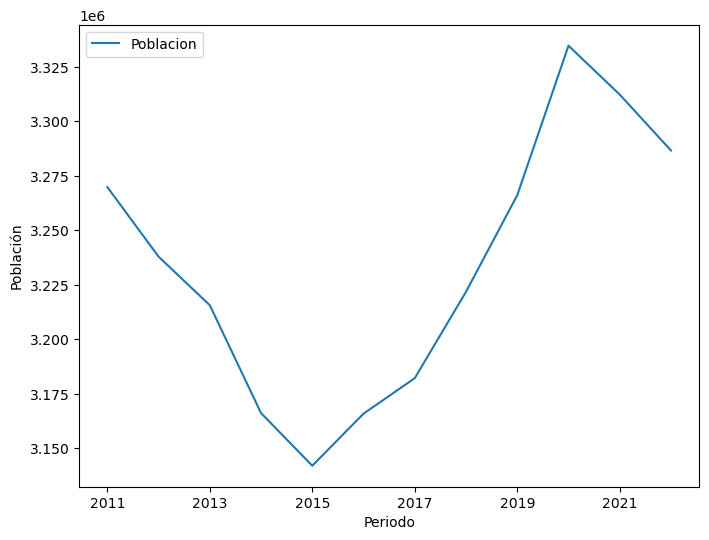

In [188]:
poblacion_cm[['Poblacion']].plot(kind='line', figsize=(8, 6))
plt.ylabel('Población')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1:.0f}M')
plt.savefig('poblacion_mad.png')
plt.show()

## Carga y limpieza de datos evolución de población en Castilla y León

In [143]:
poblacion_cyl = pd.read_csv('/Users/davidledo/Desktop/Proyectos/Proyecto_w4_ETL/data/evolucion_de_la_poblacion_en_castilla_y_leon.csv') #cargo el csv

In [154]:
poblacion_cyl

,Poblacion
Periodo,
2002,2458042
2003,2467429
2004,2475274
2005,2487533
2006,2502598
2007,2528372
2008,2546405
2009,2547569
2010,2545387


In [145]:
poblacion_cyl = poblacion_cyl.drop(range(42, 56)) #elimino las filas

In [146]:
poblacion_cyl.columns.tolist()

['Año;"Periodo";"Castilla y León\ufeff "']

In [147]:
poblacion_cyl = poblacion_cyl['Año;"Periodo";"Castilla y León\ufeff "'].str.split(';', expand=True) #divido las columnas 

In [148]:
poblacion_cyl = poblacion_cyl.drop(poblacion_cyl.columns[1], axis=1) #elimino la columna 1

In [133]:
poblacion_cyl = poblacion_cyl.drop(poblacion_cyl.index[0:18]) #elimino las filas pues solo me interesan los datos a partir del 2011

In [155]:
poblacion_cyl.to_csv('poblacion_cyl.csv', index=True)

In [149]:
new_column_names = ['Periodo', 'Poblacion'] #creo una lista con los nombres de las nuevas columnas
poblacion_cyl.rename(columns=dict(zip(poblacion_cyl.columns, new_column_names)), inplace=True) #renombro las columnas con la lista 

In [150]:
poblacion_cyl = poblacion_cyl.iloc[1::2] #elimino las filas pares

In [151]:
poblacion_cyl = poblacion_cyl.set_index('Periodo') #transformo en indice la columna Periodo

In [152]:
poblacion_cyl['Poblacion'] = poblacion_cyl['Poblacion'].str.replace(r'\D', '') #elimino los puntos de la columna poblacion

/var/folders/c4/q4g9gfss40b99pgtrgdmszbh0000gn/T/ipykernel_2843/724317860.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  poblacion_cyl['Poblacion'] = poblacion_cyl['Poblacion'].str.replace(r'\D', '') #elimino los puntos de la columna poblacion


In [153]:
poblacion_cyl['Poblacion'] = poblacion_cyl['Poblacion'].astype(int) #trasformo en integers los valores de la columna

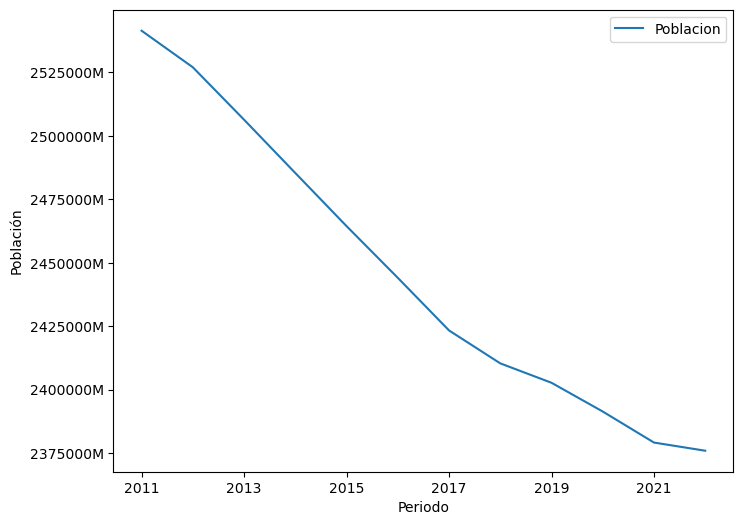

In [189]:
poblacion_cyl[['Poblacion']].plot(kind='line', figsize=(8, 6))
plt.ylabel('Población')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig('poblacion_cyl.png')
plt.show()

## Carga y limpieza de datos evolución de población en Extremadura

In [114]:
poblacion_ext = pd.read_csv('/Users/davidledo/Desktop/Proyectos/Proyecto_w4_ETL/data/evolucion_de_la_poblacion_en_extremadura.csv') #cargo el csv

In [115]:
poblacion_ext

,"Año;""Periodo"";""Extremadura﻿ """
0,"2002;""Semestre 1"";""1.057.795"""
1,"2002;""Semestre 2"";""1.058.029"""
2,"2003;""Semestre 1"";""1.060.356"""
3,"2003;""Semestre 2"";""1.062.402"""
4,"2004;""Semestre 1"";""1.064.374"""
5,"2004;""Semestre 2"";""1.066.234"""
6,"2005;""Semestre 1"";""1.070.094"""
7,"2005;""Semestre 2"";""1.071.980"""
8,"2006;""Semestre 1"";""1.074.930"""
9,"2006;""Semestre 2"";""1.077.921"""


In [116]:
poblacion_ext = poblacion_ext.drop(range(42, 56)) #elimino las filas

In [117]:
poblacion_ext.columns.tolist()

['Año;"Periodo";"Extremadura\ufeff "']

In [118]:
poblacion_ext = poblacion_ext['Año;"Periodo";"Extremadura\ufeff "'].str.split(';', expand=True) #divido las columnas 

In [119]:
poblacion_ext = poblacion_ext.drop(poblacion_ext.columns[1], axis=1) #elimino la columna 1

In [162]:
poblacion_ext = poblacion_ext.drop(poblacion_ext.index[0:18]) #elimino las filas pues solo me interesan los datos a partir del 2011

In [120]:
new_column_names = ['Periodo', 'Poblacion'] #creo una lista con los nombres de las nuevas columnas
poblacion_ext.rename(columns=dict(zip(poblacion_ext.columns, new_column_names)), inplace=True) #renombro las columnas con la lista 

In [121]:
poblacion_ext = poblacion_ext.iloc[1::2] #elimino las filas pares

In [122]:
poblacion_ext = poblacion_ext.set_index('Periodo') #transformo en indice la columna Periodo

In [123]:
poblacion_ext['Poblacion'] = poblacion_ext['Poblacion'].str.replace(r'\D', '') #elimino los puntos de la columna poblacion

/var/folders/c4/q4g9gfss40b99pgtrgdmszbh0000gn/T/ipykernel_2843/1013751345.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  poblacion_ext['Poblacion'] = poblacion_ext['Poblacion'].str.replace(r'\D', '') #elimino los puntos de la columna poblacion


In [124]:
poblacion_ext['Poblacion'] = poblacion_ext['Poblacion'].astype(int) #trasformo en integers los valores de la columna

In [125]:
poblacion_ext.to_csv('poblacion_ext', index=True)

,Poblacion
Periodo,
2002,1058029
2003,1062402
2004,1066234
2005,1071980
2006,1077921
2007,1085763
2008,1091508
2009,1097126
2010,1100441


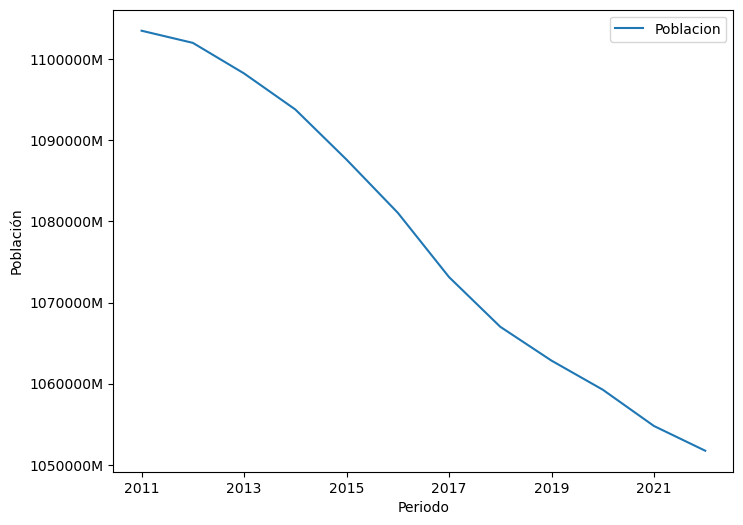

In [190]:
poblacion_ext[['Poblacion']].plot(kind='line', figsize=(8, 6))
plt.ylabel('Población')
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig('poblacion_ext.png')
plt.show()

## Grafica comparación de poblaciones

In [170]:
df = pd.concat([poblacion_cm, poblacion_cyl, poblacion_ext], keys=['poblacion_cm', 'poblacion_cyl', 'poblacion_cm'])

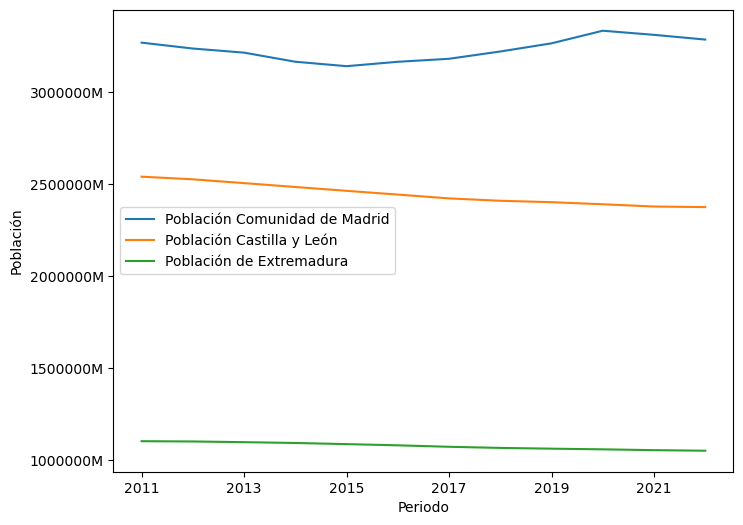

In [191]:
fig, ax = plt.subplots(figsize=(8, 6))

poblacion_cm[['Poblacion']].plot(kind='line', ax=ax)
poblacion_cyl[['Poblacion']].plot(kind='line', ax=ax)
poblacion_ext[['Poblacion']].plot(kind='line', ax=ax)
ax.set_ylabel('Población')
ax.legend(['Población Comunidad de Madrid', 'Población Castilla y León', 'Población de Extremadura'])
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.savefig('poblacion_comp.png')
plt.show()

## Carga en MongoDB

In [172]:
from pymongo import MongoClient

In [173]:
MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

str_conn = 'mongodb://localhost:27017'   # str_con por defecto

cursor = MongoClient(str_conn)

cursor

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [174]:
db = cursor.dumping_mad

In [175]:
colec = db.n_colec

In [176]:
db.list_collection_names()

['n_colec']

In [177]:
poblacion_cyl_dict = poblacion_cyl.to_dict(orient='list')

In [178]:
poblacion_cm_dict = poblacion_cm.to_dict(orient='list')

In [179]:
poblacion_ext_dict = poblacion_cm.to_dict(orient='list')

In [180]:
colec.insert_one(poblacion_cyl_dict)

In [181]:
colec.insert_one(poblacion_cm_dict)

In [182]:
colec.insert_one(poblacion_ext_dict)